In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder

## Import Data

In [2]:
bank = pd.read_csv("bank-additional-full.csv", delimiter=';')
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
bank.shape

(41188, 21)

In [5]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
bank.select_dtypes(include=['int64', 'float64']).describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


## Data Cleaning

In [7]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [8]:
bank.isnull().any()

age               False
job               False
marital           False
education         False
default           False
housing           False
loan              False
contact           False
month             False
day_of_week       False
duration          False
campaign          False
pdays             False
previous          False
poutcome          False
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
y                 False
dtype: bool

In [9]:
numerical_columns = list(bank.select_dtypes(include=['int64']).columns.values) + list(bank.select_dtypes(include=['float64']).columns.values)
categorical_columns = list(bank.select_dtypes(include=['object']))

In [10]:
print('numerical_columns:', numerical_columns)

print('categorical_columns:', categorical_columns)

numerical_columns: ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
categorical_columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']


In [11]:
bank[bank[categorical_columns]=='unknown'].count().sort_values(ascending=False)

default           8597
education         1731
housing            990
loan               990
job                330
marital             80
age                  0
poutcome             0
nr.employed          0
euribor3m            0
cons.conf.idx        0
cons.price.idx       0
emp.var.rate         0
duration             0
previous             0
pdays                0
campaign             0
day_of_week          0
month                0
contact              0
y                    0
dtype: int64

In [12]:
bank[bank[categorical_columns]=="unknown"] = np.nan

In [13]:
bank[bank[categorical_columns]=='unknown'].count().sort_values(ascending=False)

age               0
campaign          0
nr.employed       0
euribor3m         0
cons.conf.idx     0
cons.price.idx    0
emp.var.rate      0
poutcome          0
previous          0
pdays             0
duration          0
job               0
day_of_week       0
month             0
contact           0
loan              0
housing           0
default           0
education         0
marital           0
y                 0
dtype: int64

In [16]:
bank[categorical_columns]

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,NaN,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...
41183,retired,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,retired,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,technician,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


In [20]:
bank[numerical_columns]

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6


In [21]:
for num_col in numerical_columns:
    print("Nilai unik untuk kolom", num_col.upper())
    print(bank[num_col].unique())
    print('='*30)

Nilai unik untuk kolom AGE
[56 57 37 40 45 59 41 24 25 29 35 54 46 50 39 30 55 49 34 52 58 32 38 44
 42 60 53 47 51 48 33 31 43 36 28 27 26 22 23 20 21 61 19 18 70 66 76 67
 73 88 95 77 68 75 63 80 62 65 72 82 64 71 69 78 85 79 83 81 74 17 87 91
 86 98 94 84 92 89]
Nilai unik untuk kolom DURATION
[ 261  149  226 ... 1246 1556 1868]
Nilai unik untuk kolom CAMPAIGN
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 19 18 23 14 22 25 16 17 15 20 56
 39 35 42 28 26 27 32 21 24 29 31 30 41 37 40 33 34 43]
Nilai unik untuk kolom PDAYS
[ 0  6  4  3  5  1 10  7  8  9 11  2 12 13 14 15 16 21 17 18 22 25 26 19
 27 20]
Nilai unik untuk kolom PREVIOUS
[0 1 2 3 4 5 6 7]
Nilai unik untuk kolom EMP.VAR.RATE
[ 1.1  1.4 -0.1 -0.2 -1.8 -2.9 -3.4 -3.  -1.7 -1.1]
Nilai unik untuk kolom CONS.PRICE.IDX
[93.994 94.465 93.918 93.444 93.798 93.2   92.756 92.843 93.075 92.893
 92.963 92.469 92.201 92.379 92.431 92.649 92.713 93.369 93.749 93.876
 94.055 94.215 94.027 94.199 94.601 94.767]
Nilai unik untuk kolom CONS.CONF.

In [22]:
bank['pdays'].replace(999, 0, inplace=True)

In [25]:
print("jumlah missing values atribut kategori:", bank[categorical_columns].isnull().sum().sum())
print("jumlah missing values atribut numerikal:", bank[numerical_columns].isnull().sum().sum())

jumlah missing values atribut kategori: 12718
jumlah missing values atribut numerikal: 0


In [26]:
#categorical data
bankcategorical = bank[categorical_columns]

#numerical data
banknumerical = bank[numerical_columns]


In [27]:
imputer_categorical = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [28]:
imputer_categorical.fit(bankcategorical)

SimpleImputer(strategy='most_frequent')

In [29]:
bankcategorical = imputer_categorical.transform(bankcategorical)

In [30]:
bankcategorical = pd.DataFrame(bankcategorical, columns=categorical_columns)

In [31]:
bank = pd.concat([banknumerical, bankcategorical], axis=1)

In [32]:
print("jumlah nan missing values atribut kategori:", bank[categorical_columns].isnull().sum().sum())
print("jumlah nan missing values atribut numerikal:", bank[numerical_columns].isnull().sum().sum())

jumlah nan missing values atribut kategori: 0
jumlah nan missing values atribut numerikal: 0


In [33]:
bank

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,56,261,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,57,149,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,no,telephone,may,mon,nonexistent,no
2,37,226,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,40,151,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,56,307,1,0,0,1.1,93.994,-36.4,4.857,5191.0,...,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,professional.course,no,yes,no,cellular,nov,fri,nonexistent,yes
41184,46,383,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,no
41185,56,189,2,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,university.degree,no,yes,no,cellular,nov,fri,nonexistent,no
41186,44,442,1,0,0,-1.1,94.767,-50.8,1.028,4963.6,...,married,professional.course,no,no,no,cellular,nov,fri,nonexistent,yes


## Data Preprocesing 

Text(0.5, 1.0, 'Correlation Matrix')

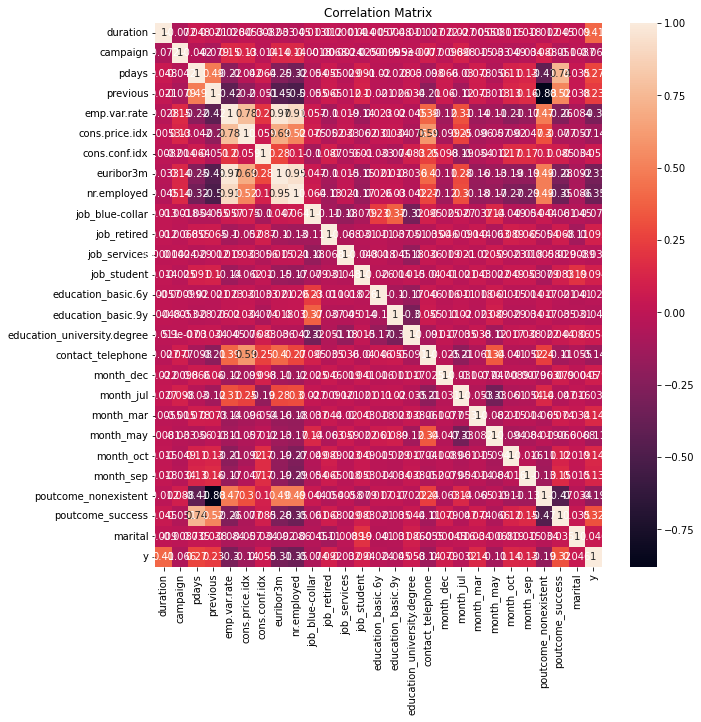

In [49]:
plt.figure(figsize=(10,10))
sns.heatmap(bank.corr(), annot=True)
plt.title('Correlation Matrix')

In [50]:
x = bank.drop('y', axis = 1)
y = bank['y']
print(x)
print(y)

       duration  campaign  pdays  previous  emp.var.rate  cons.price.idx  \
0           261         1      0         0           1.1          93.994   
1           149         1      0         0           1.1          93.994   
2           226         1      0         0           1.1          93.994   
3           151         1      0         0           1.1          93.994   
4           307         1      0         0           1.1          93.994   
...         ...       ...    ...       ...           ...             ...   
41183       334         1      0         0          -1.1          94.767   
41184       383         1      0         0          -1.1          94.767   
41185       189         2      0         0          -1.1          94.767   
41186       442         1      0         0          -1.1          94.767   
41187       239         3      0         1          -1.1          94.767   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  ...  \
0              -3

### Membagi data train dan data test

In [51]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 10)

### Random Forest

In [52]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
from sklearn import metrics

In [53]:
model = RandomForestClassifier(n_estimators=50, random_state=46)

In [54]:
model = model.fit(x_train, y_train)

In [58]:
y_model = model.predict(x_test)

In [59]:
print("Accuracy:", metrics.accuracy_score(y_test, y_model))

Accuracy: 0.9055596018451081
